In [1]:
# solving racetrack using reinforcement learning
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define the racetrack
# 0: empty
# 1: obstacle
# 2: start
# 3: finish
racetrack_map = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32)

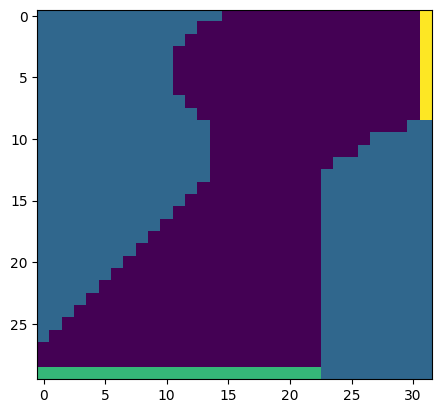

In [5]:
# plot the racetrack
plt.imshow(racetrack_map)
plt.show()

In [39]:
start_array = np.argwhere(racetrack_map == 2)
print([start_array[np.random.randint(0, len(start_array))],0,0])
action_space = np.array([
            [-1, -1], [-1, 0], [-1, 1],
            [0, -1], [0, 0], [0, 1],
            [1, -1], [1, 0], [1, 1]
        ])
print(action_space[1])
# np.random.randint(0, 9, size=(32, 32, 5, 9))

[array([29,  7]), 0, 0]
[-1  0]


In [41]:
# define racetrack class
class Racetrack:
    def __init__(self, racetrack_map):
        self.racetrack_map = racetrack_map
        self.height = racetrack_map.shape[0]
        self.width = racetrack_map.shape[1]
        self.start_array = np.argwhere(racetrack_map == 2)
        self.finish_array = np.argwhere(racetrack_map == 3)
        # start position is random zero velocity
        self.start = [self.start_array[np.random.randint(0, len(self.start_array))][0], self.start_array[np.random.randint(0, len(self.start_array))][1], 0, 0]
        # finish position is fixed
        self.position = self.start
        self.action_space = np.array([
            [-1, -1], [-1, 0], [-1, 1],
            [0, -1], [0, 0], [0, 1],
            [1, -1], [1, 0], [1, 1]
        ])
        self.reward = 0
        self.visited_cells = []
        # random policy x y dx dy 32 * 32 * 5 * 9
        self.policy = np.random.randint(0, 9, size=(self.height, self.width, 5, 9))
        # Q table x y dx dy 32 * 32 * 5 * 9 * num of actions
        self.Q = np.zeros((self.height, self.width, 5, 9, len(self.action_space)))
        self.is_done = False
        self.epsilon = 0.1
        self.gamma = 0.99
        
        
        
        
    def reset(self):
        self.position = [self.start_array[np.random.randint(0, len(self.start_array))][0], self.start_array[np.random.randint(0, len(self.start_array))][1], 0, 0]
        self.is_done = False
        
    def get_action(self, state):
        # soft policy greedy
        if np.random.random() > self.epsilon:
            return self.action_space[self.policy[state[0], state[1], state[2], state[3]]]
        else:
            return self.action_space[np.random.randint(0, len(self.action_space))] 
        
    def step(self, action):
        # update position
        self.position[0] += self.position[2]
        self.position[1] += self.position[3]
        self.position[2] += action[0]
        self.position[3] += action[1]
        # check if the car is out of the racetrack
        if self.position[0] < 0:
            self.position[0] = 0
            self.position[2] = 0
        elif self.position[0] >= self.height:
            self.position[0] = self.height - 1
            self.position[2] = 0
        elif self.position[1] < 0:
            self.position[3] = 0
            self.position[1] = 0
        elif self.position[1] >= self.width:
            self.position[3] = 0
            self.position[1] = self.width - 1
        # check if the car hits the obstacle
        if self.racetrack_map[self.position[0], self.position[1]] == 1:
            self.reset()
            self.reward = -5
        # check if the car reaches the finish line
        elif self.racetrack_map[self.position[0], self.position[1]] == 3:
            self.reward = 0
            self.is_done = True
            
        else:
            self.reward = -1
            
        return self.position, self.reward
    
    def render(self):
        racetrack_map = self.racetrack_map.copy()
        racetrack_map[self.position[0], self.position[1]] = 4
        plt.imshow(racetrack_map)
        plt.show()
        
    def get_state(self):
        return self.position
    
    def get_reward(self):
        return self.reward
    
    # update Q
    def update_Q(self, state, action, reward, next_state, alpha, gamma):
        # get the index of the action
        action_index = np.argwhere(self.action_space == action)[0][0]
        # get the index of the next state
        next_state_index = np.argwhere(self.action_space == next_state)[0][0]
        # update Q
        self.Q[state[0], state[1], state[2], state[3], action_index] += alpha * (reward + gamma * np.max(self.Q[next_state[0], next_state[1], next_state[2], next_state[3]]) - self.Q[state[0], state[1], state[2], state[3], action_index])
        
    # update policy
    def update_policy(self, state):
        # get the index of the state
        state_index = np.argwhere(self.action_space == state)[0][0]
        # update policy
        self.policy[state[0], state[1], state[2], state[3]] = np.argmax(self.Q[state[0], state[1], state[2], state[3]]) if np.random.random() > self.epsilon else np.random.randint(0, len(self.action_space))
        
    # run the car mont carlo
    def run_mont_carlo(self, alpha, gamma):
        # reset the car
        self.reset()
        # save rewards and states
        rewards = []
        states = []
        # run the car until it reaches the finish line
        while not self.is_done:
            # get the current state
            state = self.get_state()
            # get the current action
            action = self.get_action(state)
            # save the current state
            states.append(state)
            # save the current reward
            rewards.append(self.get_reward())
            # update the car
            self.step(action)
        # calculate the return
        G = 0
        # save the return
        returns = []
        # calculate the return for each state
        for i in range(len(states) - 1, -1, -1):
            G = gamma * G + rewards[i]
            returns.append(G)
            
        # reverse the returns
        returns.reverse()
        # update Q and policy
        for i in range(len(states)):
            self.update_Q(states[i], self.action_space[self.policy[states[i][0], states[i][1], states[i][2], states[i][3]]], returns[i], states[i + 1], alpha, gamma)
            self.update_policy(states[i])
        
        self.epsilon *= self.gamma
        
        
        
        
#
        
        
        
    
        
        

In [42]:
# main code 
racetrack = Racetrack(racetrack_map)

In [43]:
# run the car
for i in range(1000):
    racetrack.run_mont_carlo(0.1, 0.99)
    if i % 100 == 0:
        print(i)

ValueError: operands could not be broadcast together with shapes (9,2) (4,) 